# This notebook contains the code which prepares training and test datasets for a model trained with the bag-of-words technique, as well as trains and evaluates this model

## Connect the notebook to MyDrive




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import all necessary libraries

In [20]:
# Import # Standard python libraries for data processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# NLP packages for text processing
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

# Libraries to build, train, evaluate, and save an ML model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

## Load train and test datasets


In [5]:
# Import train dataset into pandas DataFrame
train_df = pd.read_csv("drive/MyDrive/python_project/data/train_df.csv")
# Print first 5 rows to see if everything is imported correctly and data is shuffled as we did it at the end of the data-preprocessing notebook
print(train_df.head())

# Import test dataset into pandas DataFrame
test_df = pd.read_csv("drive/MyDrive/python_project/data/test_df.csv")
# Print first 5 rows to see if everything is imported correctly and data is shuffled as we did it at the end of the data-preprocessing notebook
print(test_df.head())

                                            dialogue     name
0   I’ll say it looks good. It’s in my proprietar...  Sheldon
1   Wait, wait, wait. When did you send my mom no...  Leonard
2            I never had a beer with my dad, either.   Howard
3                      My thank you was not sincere.  Sheldon
4   I’m calling to invite you to a spontaneous da...  Sheldon
                                            dialogue     name
0                      Yeah, that’s when it started.  Leonard
1   A million dollars? God, it’s like my nuts jus...   Howard
2   Dinner’s almost ready. If you like meatloaf, ...   Howard
3   Well, Leonard, I think it’s high time you and...  Sheldon
4              All right. It is a comfortable chair.  Sheldon


## Feature engineering

## Prepare train and test datasets for the bog feature

Use CountVectorizer to create a sparse vector of words


In [6]:
# Get a list of dialogues and names from the train dataset
train_dialogues = train_df['dialogue'].astype(str).apply(lambda x: x.lower()).to_list()
train_names = train_df['name'].astype(str).apply(lambda x: x.lower()).to_list()
print(train_dialogues[:5])
print(train_names[:5])

# Get a list of dialogues and names from the test dataset
test_dialogues = test_df['dialogue'].astype(str).apply(lambda x: x.lower()).to_list()
test_names = test_df['name'].astype(str).apply(lambda x: x.lower()).to_list()
print(test_dialogues[:5])
print(test_names[:5])

[' i’ll say it looks good. it’s in my proprietary font, shelvetica.', ' wait, wait, wait. when did you send my mom notes on a paper?', ' i never had a beer with my dad, either.', ' my thank you was not sincere.', ' i’m calling to invite you to a spontaneous date night tomorrow evening.']
['sheldon', 'leonard', 'howard', 'sheldon', 'sheldon']
[' yeah, that’s when it started.', ' a million dollars? god, it’s like my nuts just kicked me in the nuts. that’s it, i got to start earning more money right now.', ' dinner’s almost ready. if you like meatloaf, i’m sure you’ll like its cousin, bowl of meat.', ' well, leonard, i think it’s high time you and i address the tweepadock in the room.', ' all right. it is a comfortable chair.']
['leonard', 'howard', 'howard', 'sheldon', 'sheldon']


In [10]:
# Create a CountVectorizer to convert dialogues into a matrix of token counts
# get a list of stop words
list_of_stop_words = list(STOP_WORDS)
# initialize CountVectorizer instance with stoo words parameters from scikit-learn
count_vectorizer = CountVectorizer(stop_words=(list_of_stop_words))
# process dialogues from the train dataset
train_features = count_vectorizer.fit_transform(train_dialogues)
# process dialogues from the test dataset
test_features = count_vectorizer.transform(test_dialogues)

## Define a function to train a model

In [29]:
def train(algorithm):
    # Make an instance of the Model
    model = algorithm

    # Train the model
    model.fit(train_features, train_names)

    # Print the labels
    print(model.classes_)

    # Print parameters of the model
    print(model.get_params())

    return model


## Train Logistic Regression model with Bag of words technique

In [32]:
lr_bow = train(LogisticRegression())

['howard' 'leonard' 'penny' 'sheldon']
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Define a function to save the model

In [34]:
def save(filename, model):
    with open(f"drive/MyDrive/python_project/{filename}", 'wb') as file:
        pickle.dump(model, file)
    print("Model has been successfully saved.")
    pass

## Save Logistic Regression model trained with BOW technique

In [35]:
save("lr_bow_model.pkl", lr_bow)

Model has been successfully saved.


## Get predictions

In [12]:
# Define a funtion that will take the index of the dialogue in the test features and predict the name to whom this dialogue might belong
def getPrediction(model):
    predictions = model.predict(test_features)
    return predictions

## Evaluate the logistic regression model trained with 5-grams of POS combinations feature


### Accuracy

In [49]:
# Define a function that will present the Accuracy score
def accuracy(model, model_name):
    # Get prediction of all dialogues
    predictions = getPrediction(model)
    # Use accuracy_score funtion to calculate the accuracy
    accuracy = accuracy_score(test_names, predictions)
    # Print the accuracy
    print(f"Accuracy of the {model_name} model:", accuracy)
    return predictions

In [48]:
# Get prediction of all dialogues
predictions_lr = accuracy(lr_bow, "Logistic Regression")

Accuracy of the Logistic Regression model: 0.39251523063533506


### Confusion matrix visualization

In [51]:
# Define a function to visualize confusion matrix
def cm_visualize(model, predictions):
    # Get the labels
    labels = model.classes_
    # Get the confusion matrix
    cm = confusion_matrix(test_names, predictions, labels=labels)
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()

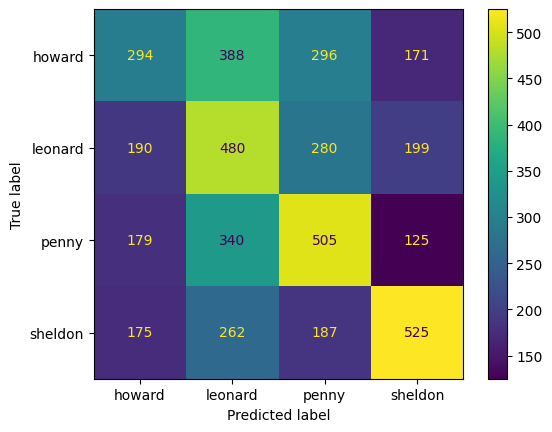

In [52]:
cm_visualize(lr_bow, predictions_lr)

# Get classification report

In [16]:
# Print the classification report
print(classification_report(test_names, predictions_lr))

              precision    recall  f1-score   support

      howard       0.35      0.26      0.30      1149
     leonard       0.33      0.42      0.37      1149
       penny       0.40      0.44      0.42      1149
     sheldon       0.51      0.46      0.48      1149

    accuracy                           0.39      4596
   macro avg       0.40      0.39      0.39      4596
weighted avg       0.40      0.39      0.39      4596



## Train stochastic gradient descent classifier model

In [36]:
# Train the SGDClassifier Model
sgd_bow = train(SGDClassifier())

['howard' 'leonard' 'penny' 'sheldon']
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


## Save Stochastic gradient descent classifier model trained with BOW technique

In [37]:
save("sgd_bow_model.pkl", sgd_bow)

Model has been successfully saved.


## Evaluate SDGClassifier model trained with BOW technique

### Accuracy

In [53]:
# Get prediction of all dialogues
predictions_sgd = accuracy(sgd_bow, "SGDClassifier")

Accuracy of the SGDClassifier model: 0.38903394255874674


### Confusion matrix visualization

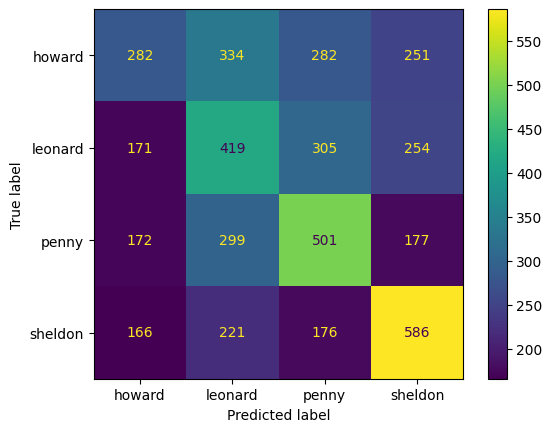

In [54]:
cm_visualize(sgd_bow, predictions_sgd)

### Get classification report

In [25]:
# Print the classification report
print(classification_report(test_names, predictions_sgd))

              precision    recall  f1-score   support

      howard       0.31      0.30      0.31      1149
     leonard       0.34      0.27      0.30      1149
       penny       0.39      0.44      0.41      1149
     sheldon       0.46      0.51      0.49      1149

    accuracy                           0.38      4596
   macro avg       0.38      0.38      0.38      4596
weighted avg       0.38      0.38      0.38      4596



## Train Random Forest Classifier model with BOW technique

In [38]:
# Make an instance of the Model from LogisticRegression class
rf_bow = train(RandomForestClassifier())

['howard' 'leonard' 'penny' 'sheldon']
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Save RandomForestClassifier model trained with BOW technique

In [39]:
save('rf_bow_model.pkl', rf_bow)

Model has been successfully saved.


## Evaluate Random Forest Classifier model trained with BOW technique

### Accuracy

In [55]:
predictions_rf = accuracy(rf_bow, 'RandomForestClassifier')

Accuracy of the RandomForestClassifier model: 0.3494342906875544


### Confusion matrix visualization

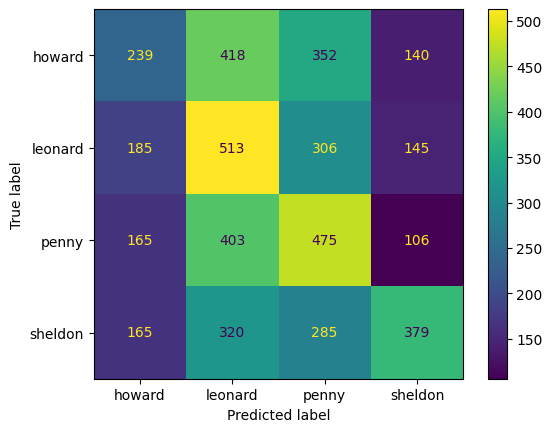

In [56]:
cm_visualize(rf_bow, predictions_rf)

### Get classification report

In [42]:
# Print the classification report
print(classification_report(test_names, predictions_rf))

              precision    recall  f1-score   support

      howard       0.32      0.21      0.25      1149
     leonard       0.31      0.45      0.37      1149
       penny       0.33      0.41      0.37      1149
     sheldon       0.49      0.33      0.39      1149

    accuracy                           0.35      4596
   macro avg       0.36      0.35      0.35      4596
weighted avg       0.36      0.35      0.35      4596



## Train Multinominal Naive Bayes model with BOW technique

In [43]:
mnb_bow = train(MultinomialNB())

['howard' 'leonard' 'penny' 'sheldon']
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


## Save MultinominalNB model trained with BOW technique

In [44]:
save("mnb_bow_model.pkl", mnb_bow)

Model has been successfully saved.


## Evaluate the MultinominalNB model trained with BOW technique

Accuracy

In [57]:
# Get prediction of all dialogues
predictions_mnb = accuracy(mnb_bow, 'MultinominalNB')

Accuracy of the MultinominalNB model: 0.38946910356832026


### Confusion matrix visualization

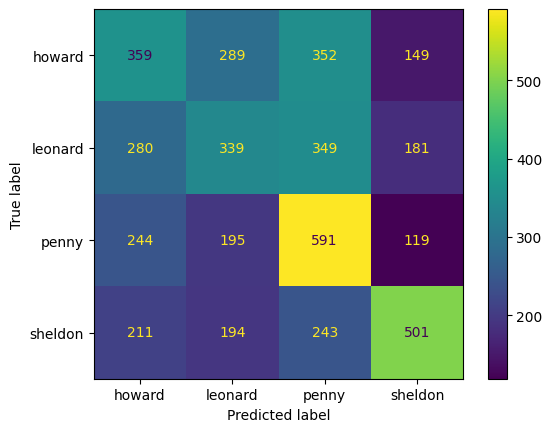

In [59]:
cm_visualize(mnb_bow, predictions_mnb)

### Get classification report

In [60]:
# Print the classification report
print(classification_report(test_names, predictions_mnb))

              precision    recall  f1-score   support

      howard       0.33      0.31      0.32      1149
     leonard       0.33      0.30      0.31      1149
       penny       0.39      0.51      0.44      1149
     sheldon       0.53      0.44      0.48      1149

    accuracy                           0.39      4596
   macro avg       0.39      0.39      0.39      4596
weighted avg       0.39      0.39      0.39      4596



# Discussion

We trained different models with the same feature to see if it affects the results. However, the experiment shows that there is almost no difference in accuracy scores for different models trained with BOW technique. The highes accuracy score is obtained by the LogisticRegression model. Therefore, we decided not to train models with other algorithms but train them with different features and the combination of all features.